## Cenário III



### Instalando as bibliotecas 

https://pyomo.readthedocs.io/en/stable/

In [ ]:
pip install pyomo

     |████████████████████████████████| 9.1 MB 2.0 MB/s 
     |████████████████████████████████| 49 kB 6.1 MB/s 


Precisa instalar um solver para resolução do problema. 

Como o problema não é grande, escolhi o glpk por seu um solver open source.

In [ ]:
!apt-get install -y -qq glpk-utils

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 155219 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.1.2-2_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_4.65-1_amd64.deb ...
Unpacking libglpk40:amd64 (4.65-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_4.65-1_amd64.deb ...
Unpacking glpk-utils (4.65-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Setting up libcolamd2:amd64 (1:5.1.2-2) ...
Setting up libamd2:amd64 

### Importando as bibliotecas

In [ ]:
import pyomo.environ as pyo
import numpy as np
import pandas as pd
from pyomo.environ import *
from pyomo.opt import SolverFactory
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.neighbors import DistanceMetric
from math import radians
import matplotlib.pyplot as plt
import seaborn as sns

### Visão Geral dos Dados

In [ ]:
states_coords = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lambda3/Teste 3/states_coords.csv')
state_gmaps = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lambda3/Teste 3/states_gmaps.csv')
state_line = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lambda3/Teste 3/states_line.csv')
state_merged = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lambda3/Teste 3/states_line.csv')

In [ ]:
states_coords.shape

(26, 3)

In [ ]:
states_coords.head()

,estado,lat,lng
0,São Paulo,-23.5587,-46.6250
1,Rio de Janeiro,-22.9250,-43.2250
2,Minas Gerais,-19.9150,-43.9150
3,Rio Grande do Sul,-30.0500,-51.2000
4,Pernambuco,-8.0756,-34.9156


In [ ]:
state_gmaps.shape

(26, 26)

In [ ]:
state_gmaps.head()

,São Paulo,Rio de Janeiro,Minas Gerais,Rio Grande do Sul,Pernambuco,Ceará,Bahia,Paraná,Pará,Goiás,Amazonas,Espírito Santo,Alagoas,Rio Grande do Norte,Maranhão,Santa Catarina,Paraíba,Piauí,Mato Grosso,Mato Grosso do Sul,Sergipe,Amapá,Rondônia,Acre,Tocantins,Roraima
0,0.0,434394.0,591068.0,1135135.0,2696840.0,3089984.0,2027872.0,414738.0,2903398.0,898426.0,3873378.0,943063.0,2479781.0,2989651.0,2994916.0,695461.0,2821456.0,2652282.0,1525607.0,992362.0,2222865.0,NaN,2985865.0,NaN,1812075.0,4621177.0
1,432204.0,0.0,441388.0,1568370.0,2300806.0,2586958.0,1631839.0,847974.0,3203717.0,1297651.0,4272603.0,522467.0,2083748.0,2593617.0,2930901.0,1128697.0,2425423.0,2588267.0,1924832.0,1416651.0,1826831.0,NaN,3385090.0,NaN,1985219.0,5020402.0
2,585937.0,440984.0,0.0,1721955.0,2136626.0,2422778.0,1467659.0,1001558.0,2772567.0,874594.0,3920763.0,522914.0,1919568.0,2429437.0,2499751.0,1282281.0,2261243.0,2157117.0,1572993.0,1263266.0,1662651.0,NaN,3033251.0,NaN,1554069.0,4668563.0
3,1142980.0,1568952.0,1725626.0,0.0,3831398.0,4197532.0,3162430.0,746179.0,4010947.0,2005975.0,4475083.0,2077621.0,3614339.0,4124208.0,4102465.0,456359.0,3956014.0,3759830.0,2127312.0,1425252.0,3357423.0,NaN,3587570.0,NaN,2919623.0,5222882.0
4,2640150.0,2301090.0,2084925.0,3776169.0,0.0,758591.0,806870.0,3055772.0,2025438.0,2314386.0,4673457.0,1842373.0,259029.0,288291.0,1553531.0,3336495.0,120096.0,1120608.0,3173456.0,3153700.0,501161.0,NaN,4181848.0,NaN,2039349.0,5421256.0


In [ ]:
state_line.shape

(26, 26)

In [ ]:
state_line.head()

,São Paulo,Rio de Janeiro,Minas Gerais,Rio Grande do Sul,Pernambuco,Ceará,Bahia,Paraná,Pará,Goiás,Amazonas,Espírito Santo,Alagoas,Rio Grande do Norte,Maranhão,Santa Catarina,Paraíba,Piauí,Mato Grosso,Mato Grosso do Sul,Sergipe,Amapá,Rondônia,Acre,Tocantins,Roraima
0,0.000000,354.557321,492.561745,852.763702,2126.951268,2366.805644,1457.532585,342.443520,2467.265855,810.258174,2692.100335,739.078082,1934.896693,2323.038817,2354.312081,485.997551,2219.374772,2094.675477,1330.507665,893.525598,1731.087701,2667.276248,2468.533941,2708.559270,1492.162778,3304.536603
1,354.557321,0.000000,342.337926,1121.072276,1875.035468,2190.647081,1215.465687,677.792623,2455.146750,938.003328,2850.957201,413.604734,1681.333702,2090.563375,2272.863474,742.657583,1973.855227,1983.803733,1577.605256,1208.758382,1486.300610,2690.286145,2710.242987,2984.087454,1510.388182,3431.919571
2,492.561745,342.337926,0.000000,1344.567917,1635.086515,1888.834505,965.600360,826.013748,2113.032483,670.440922,2558.520490,373.438917,1443.494067,1830.756448,1935.663477,972.709424,1726.940870,1652.997918,1376.313628,1118.632967,1238.956225,2351.045347,2482.002571,2790.495163,1174.123563,3120.769148
3,852.763702,1121.072276,1344.567917,0.000000,2975.531406,3212.503748,2306.960107,547.212395,3194.128093,1495.239654,3137.700120,1534.309234,2782.668061,3175.307750,3148.686052,379.045917,3069.619614,2912.951307,1686.118439,1121.554669,2580.662593,3346.164787,2712.819615,2820.369451,2224.310608,3791.702726
4,2126.951268,1875.035468,1635.086515,2975.531406,0.000000,629.108539,669.488856,2460.033424,1673.663528,1833.172567,2830.394714,1483.217113,193.702390,257.839035,1205.820012,2598.939651,108.480926,929.975492,2448.546265,2526.112206,396.445424,2003.187408,3189.355451,3617.166405,1487.819797,3103.051463


In [ ]:
state_merged.shape

(26, 26)

In [ ]:
state_merged.head()

,São Paulo,Rio de Janeiro,Minas Gerais,Rio Grande do Sul,Pernambuco,Ceará,Bahia,Paraná,Pará,Goiás,Amazonas,Espírito Santo,Alagoas,Rio Grande do Norte,Maranhão,Santa Catarina,Paraíba,Piauí,Mato Grosso,Mato Grosso do Sul,Sergipe,Amapá,Rondônia,Acre,Tocantins,Roraima
0,0.000000,354.557321,492.561745,852.763702,2126.951268,2366.805644,1457.532585,342.443520,2467.265855,810.258174,2692.100335,739.078082,1934.896693,2323.038817,2354.312081,485.997551,2219.374772,2094.675477,1330.507665,893.525598,1731.087701,2667.276248,2468.533941,2708.559270,1492.162778,3304.536603
1,354.557321,0.000000,342.337926,1121.072276,1875.035468,2190.647081,1215.465687,677.792623,2455.146750,938.003328,2850.957201,413.604734,1681.333702,2090.563375,2272.863474,742.657583,1973.855227,1983.803733,1577.605256,1208.758382,1486.300610,2690.286145,2710.242987,2984.087454,1510.388182,3431.919571
2,492.561745,342.337926,0.000000,1344.567917,1635.086515,1888.834505,965.600360,826.013748,2113.032483,670.440922,2558.520490,373.438917,1443.494067,1830.756448,1935.663477,972.709424,1726.940870,1652.997918,1376.313628,1118.632967,1238.956225,2351.045347,2482.002571,2790.495163,1174.123563,3120.769148
3,852.763702,1121.072276,1344.567917,0.000000,2975.531406,3212.503748,2306.960107,547.212395,3194.128093,1495.239654,3137.700120,1534.309234,2782.668061,3175.307750,3148.686052,379.045917,3069.619614,2912.951307,1686.118439,1121.554669,2580.662593,3346.164787,2712.819615,2820.369451,2224.310608,3791.702726
4,2126.951268,1875.035468,1635.086515,2975.531406,0.000000,629.108539,669.488856,2460.033424,1673.663528,1833.172567,2830.394714,1483.217113,193.702390,257.839035,1205.820012,2598.939651,108.480926,929.975492,2448.546265,2526.112206,396.445424,2003.187408,3189.355451,3617.166405,1487.819797,3103.051463


#### Cenários a serem demonstrados

Cenário 1
Neste caso tem o state_coord que possui as latitudes e longitudes de cada cidade e será gerado uma matriz de distâncias.

Cenário 2
Será usada a matriz de distância com informações do Google.

### Cenário 1

In [ ]:
states_coords.head()

,estado,lat,lng
0,São Paulo,-23.5587,-46.6250
1,Rio de Janeiro,-22.9250,-43.2250
2,Minas Gerais,-19.9150,-43.9150
3,Rio Grande do Sul,-30.0500,-51.2000
4,Pernambuco,-8.0756,-34.9156


Foi definidod como método o cáculo da distância euclidiana.

In [ ]:
dist = DistanceMetric.get_metric('haversine')

In [ ]:
states_coords['lat_rad'] = states_coords['lat'].apply(radians)
states_coords['long_rad'] = states_coords['lng'].apply(radians)

In [ ]:
states_coords.head()

,estado,lat,lng,lat_rad,long_rad
0,São Paulo,-23.5587,-46.6250,-0.411177,-0.813760
1,Rio de Janeiro,-22.9250,-43.2250,-0.400117,-0.754419
2,Minas Gerais,-19.9150,-43.9150,-0.347582,-0.766461
3,Rio Grande do Sul,-30.0500,-51.2000,-0.524471,-0.893609
4,Pernambuco,-8.0756,-34.9156,-0.140946,-0.609392


In [ ]:
distancia = pd.DataFrame(dist.pairwise(states_coords[['lat_rad','long_rad']].to_numpy())*6373)

In [ ]:
distancia.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.000000,354.557321,492.561745,852.763702,2126.951268,2366.805644,1457.532585,342.443520,2467.265855,810.258174,2692.100335,739.078082,1934.896693,2323.038817,2354.312081,485.997551,2219.374772,2094.675477,1330.507665,893.525598,1731.087701,2667.276248,2468.533941,2708.559270,1492.162778,3304.536603
1,354.557321,0.000000,342.337926,1121.072276,1875.035468,2190.647081,1215.465687,677.792623,2455.146750,938.003328,2850.957201,413.604734,1681.333702,2090.563375,2272.863474,742.657583,1973.855227,1983.803733,1577.605256,1208.758382,1486.300610,2690.286145,2710.242987,2984.087454,1510.388182,3431.919571
2,492.561745,342.337926,0.000000,1344.567917,1635.086515,1888.834505,965.600360,826.013748,2113.032483,670.440922,2558.520490,373.438917,1443.494067,1830.756448,1935.663477,972.709424,1726.940870,1652.997918,1376.313628,1118.632967,1238.956225,2351.045347,2482.002571,2790.495163,1174.123563,3120.769148
3,852.763702,1121.072276,1344.567917,0.000000,2975.531406,3212.503748,2306.960107,547.212395,3194.128093,1495.239654,3137.700120,1534.309234,2782.668061,3175.307750,3148.686052,379.045917,3069.619614,2912.951307,1686.118439,1121.554669,2580.662593,3346.164787,2712.819615,2820.369451,2224.310608,3791.702726
4,2126.951268,1875.035468,1635.086515,2975.531406,0.000000,629.108539,669.488856,2460.033424,1673.663528,1833.172567,2830.394714,1483.217113,193.702390,257.839035,1205.820012,2598.939651,108.480926,929.975492,2448.546265,2526.112206,396.445424,2003.187408,3189.355451,3617.166405,1487.819797,3103.051463


###### Podemos Plotar as Capitais em ponsto com a descrição de cada um dos Estados

Text(0, 1, 'Latitude')

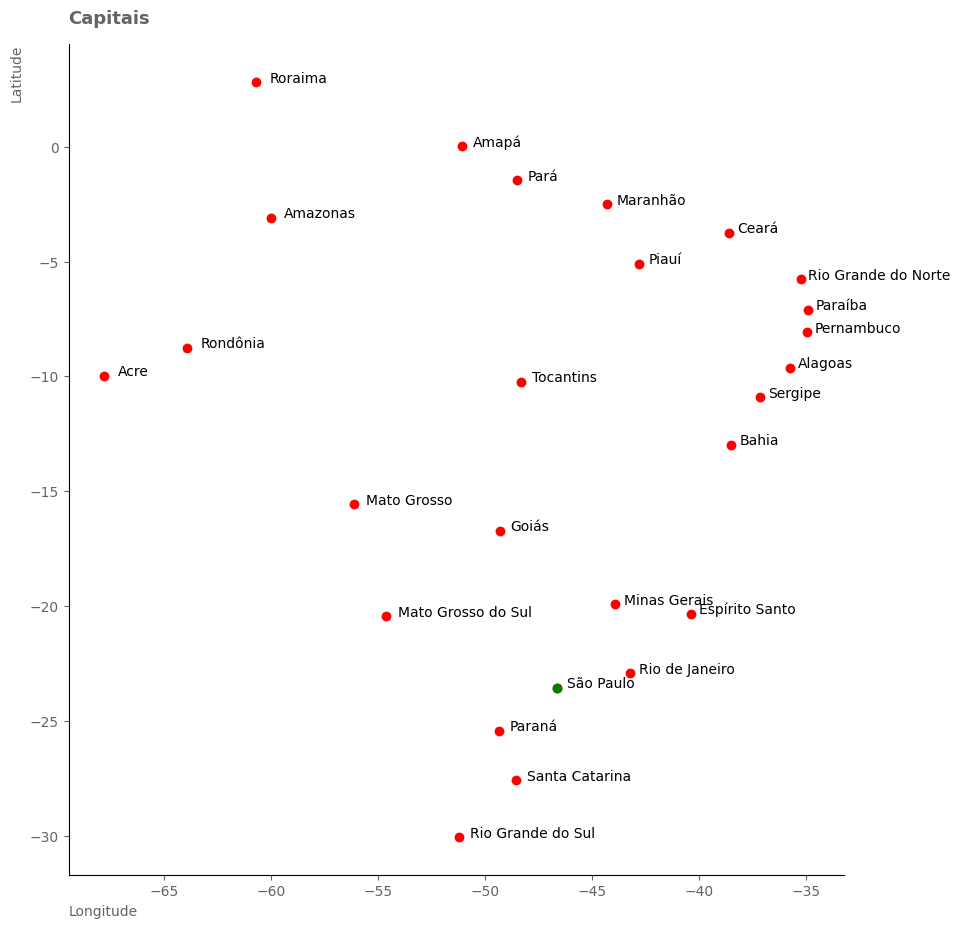

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 11), dpi=100)
sns.scatterplot(data=states_coords.loc[0:len(distancia),:], x="lng", y="lat", s=50, linewidth=0, color='red',
                ax=ax)
sns.scatterplot(x=[states_coords.loc[0,"lng"]], y=[states_coords.loc[0,"lat"]], s=50, linewidth=0, color='green',
                ax=ax)

ax.set_title('Capitais', color='#646369', loc='left', pad=15, fontsize=13, weight='bold')
ax.tick_params(axis='both', colors='#646369',
                labelsize=10)  

for i in distancia.index:
    ax.text(states_coords.loc[i,'lng']-0.01*states_coords.loc[i,'lng'], states_coords.loc[i,'lat'], capitais[i],color='black', fontsize=10)


ax.spines['bottom'].set_color('black')  
ax.spines['left'].set_color('black') 
ax.spines['right'].set_visible(False)      
ax.spines['top'].set_visible(False) 

ax.set_xlabel('Longitude', color='#646369', fontsize=10, position=(0, 0), horizontalalignment='left')
ax.set_ylabel('Latitude', color='#646369', fontsize=10, position=(0, 1), horizontalalignment='right')


##### Caixeiro Viajante

Para a implementação do Caixeiro Viajante será utilizada a restrição de eliminação de sub-ciclo proposta por Miller-Tucker-Zemlin (TMZ).


Como referências:

Desrocher, M., Laporte, G., Improvements and extensions to the Miller-Tucker-Zemlin subtour elimination constraints, Operations Research Letters, 10, 27-36, 1991. 

https://www.sciencedirect.com/science/article/pii/0167637791900832


###### Modelo Matemático

**Conjunto das cidades:**

$i,j \in N$

<br>

**Parâmetros:**

$ dist_{ij} \rightarrow$ distancia da cidade $i$ até $j$
 
$ c_{ij} \rightarrow$ custo da cidade $i$ até $j$ 

<br>

**Variáveis de decisão:**

Indica que o caminho é utilizado.

$ x_{ij} \rightarrow \{0,1\} $

$ 1 \leq u_i \leq n-1 \quad (i = 2, ... ,n \rightarrow \quad i\neq j) $
<br>

**Função objetivo:**

$ Min \displaystyle\sum_{i \neq j} c_{ij}x_{ij}$

<br>

Sujeito a:
Garante que o caixeiro saia da cidade:

$\displaystyle\sum_{j \in N} x_{ij} = 1 \quad\forall \:i \in N \quad i\neq j $

Garante que o caixeiro chegue na próxima cidade:

$\displaystyle\sum_{i \in N} x_{ij} = 1 \quad\forall \:j \in N \quad i\neq j $

Garante a não formação de sub-ciclos: 

MTZ:

$ u_i - u_j + (n - 1)x_{ij} \leq n-1 \quad\forall \:i \in U \quad j \in N \quad i\neq j $





###### Cria o modelo no pyomo

In [ ]:
model = pyo.ConcreteModel('TSP - Cenario 1')

###### Conjuntos das Cidades 

In [ ]:
n = len(distancia) # defini o tamanho do conjunto

model.N = pyo.RangeSet(0, n-1)
model.M = pyo.RangeSet(0, n-1)
model.U = pyo.RangeSet(1, n-1)  # criacao de um indice para a variavel u


###### Variáveis de decisão

In [ ]:
model.x = pyo.Var(model.N, model.M, within=pyo.Binary)
model.u = pyo.Var(model.N, within=pyo.NonNegativeReals, bounds=(0, n - 1))

###### Custo (no caso apenas a distância)

In [ ]:
model.c = pyo.Param(model.N, model.M, initialize=lambda model, i, j: distancia[i][j])

###### Função Objetivo 

$ Min \displaystyle\sum_{i \neq j} c_{ij}x_{ij}$

In [ ]:
# Função objetivo -> Minimizar custo
def obj_func(model):
    return sum(model.x[i, j] * model.c[i, j] for i in model.N for j in model.M)

model.ob = pyo.Objective(rule=obj_func, sense=pyo.minimize)   
model.ob.pprint()

ob : Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : minimize : 354.55732114895113*x[0,1] + 492.5617450308607*x[0,2] + 852.7637021355066*x[0,3] + 2126.9512683647326*x[0,4] + 2366.8056442980705*x[0,5] + 1457.5325852189137*x[0,6] + 342.44351997770644*x[0,7] + 2467.265854735025*x[0,8] + 810.2581741905569*x[0,9] + 2692.100334920603*x[0,10] + 739.0780817445959*x[0,11] + 1934.8966926677808*x[0,12] + 2323.0388174725467*x[0,13] + 2354.3120812136726*x[0,14] + 485.99755083778155*x[0,15] + 2219.3747721065556*x[0,16] + 2094.6754771826522*x[0,17] + 1330.5076653383737*x[0,18] + 893.5255978682686*x[0,19] + 1731.0877013374218*x[0,20] + 2667.276248003263*x[0,21] + 2468.5339408544323*x[0,22] + 2708.5592700284105*x[0,23] + 1492.1627781240088*x[0,24] + 3304.5366034004887*x[0,25] + 354.55732114895113*x[1,0] + 342.33792618067423*x[1,2] + 1121.0722756624782*x[1,3] + 1875.0354683944065*x[1,4] + 2190.647080739032*x[1,5] + 1215.4656870939993*x[1,6] + 677.79262255450

###### Restrições



 $\displaystyle\sum_{j \in M} x_{ij} = 1 \quad\forall \:i \in N \quad i\neq j \quad$  (R1)

In [ ]:
def rule_c1(model, j):
  return sum(model.x[i, j] for i in model.N if i != j) == 1

model.c1 = pyo.Constraint(model.N, rule=rule_c1)
model.c1.pprint()

c1 : Size=26, Index=N, Active=True
    Key : Lower : Body                                                                                                                                                                                                                                                                   : Upper : Active
      0 :   1.0 :                         x[1,0] + x[2,0] + x[3,0] + x[4,0] + x[5,0] + x[6,0] + x[7,0] + x[8,0] + x[9,0] + x[10,0] + x[11,0] + x[12,0] + x[13,0] + x[14,0] + x[15,0] + x[16,0] + x[17,0] + x[18,0] + x[19,0] + x[20,0] + x[21,0] + x[22,0] + x[23,0] + x[24,0] + x[25,0] :   1.0 :   True
      1 :   1.0 :                         x[0,1] + x[2,1] + x[3,1] + x[4,1] + x[5,1] + x[6,1] + x[7,1] + x[8,1] + x[9,1] + x[10,1] + x[11,1] + x[12,1] + x[13,1] + x[14,1] + x[15,1] + x[16,1] + x[17,1] + x[18,1] + x[19,1] + x[20,1] + x[21,1] + x[22,1] + x[23,1] + x[24,1] + x[25,1] :   1.0 :   True
      2 :   1.0 :                         x[0,2] + x[1,2] + x[3,2] + x[



$\displaystyle\sum_{i \in N} x_{ij} = 1 \quad\forall \:j \in N \quad i\neq j \quad $ (R2)

In [ ]:
def rule_c2(model, i):
    return sum(model.x[i, j] for j in model.M if i != j) == 1

model.c2 = pyo.Constraint(model.N, rule=rule_c2)
model.c2.pprint()

c2 : Size=26, Index=N, Active=True
    Key : Lower : Body                                                                                                                                                                                                                                                                   : Upper : Active
      0 :   1.0 :                         x[0,1] + x[0,2] + x[0,3] + x[0,4] + x[0,5] + x[0,6] + x[0,7] + x[0,8] + x[0,9] + x[0,10] + x[0,11] + x[0,12] + x[0,13] + x[0,14] + x[0,15] + x[0,16] + x[0,17] + x[0,18] + x[0,19] + x[0,20] + x[0,21] + x[0,22] + x[0,23] + x[0,24] + x[0,25] :   1.0 :   True
      1 :   1.0 :                         x[1,0] + x[1,2] + x[1,3] + x[1,4] + x[1,5] + x[1,6] + x[1,7] + x[1,8] + x[1,9] + x[1,10] + x[1,11] + x[1,12] + x[1,13] + x[1,14] + x[1,15] + x[1,16] + x[1,17] + x[1,18] + x[1,19] + x[1,20] + x[1,21] + x[1,22] + x[1,23] + x[1,24] + x[1,25] :   1.0 :   True
      2 :   1.0 :                         x[2,0] + x[2,1] + x[2,3] + x[



$ u_i - u_j + (n - 1)x_{ij} \leq n-1 \quad\forall \:i \in U \quad j \in N \quad i\neq j \quad$ (R3)

In [ ]:
def rule_c3(model, i, j):
    if i!=j:
        return model.u[i] - model.u[j] + model.x[i, j] * n <= n - 1
    else:
        return model.u[i] - model.u[i] == 0

model.c3 = pyo.Constraint(model.U, model.N, rule=rule_c3)
model.c3.pprint()

c3 : Size=650, Index=c3_index, Active=True
    Key      : Lower : Body                        : Upper : Active
      (1, 0) :  -Inf :     u[1] - u[0] + 26*x[1,0] :  25.0 :   True
      (1, 1) :   0.0 :                 u[1] - u[1] :   0.0 :   True
      (1, 2) :  -Inf :     u[1] - u[2] + 26*x[1,2] :  25.0 :   True
      (1, 3) :  -Inf :     u[1] - u[3] + 26*x[1,3] :  25.0 :   True
      (1, 4) :  -Inf :     u[1] - u[4] + 26*x[1,4] :  25.0 :   True
      (1, 5) :  -Inf :     u[1] - u[5] + 26*x[1,5] :  25.0 :   True
      (1, 6) :  -Inf :     u[1] - u[6] + 26*x[1,6] :  25.0 :   True
      (1, 7) :  -Inf :     u[1] - u[7] + 26*x[1,7] :  25.0 :   True
      (1, 8) :  -Inf :     u[1] - u[8] + 26*x[1,8] :  25.0 :   True
      (1, 9) :  -Inf :     u[1] - u[9] + 26*x[1,9] :  25.0 :   True
     (1, 10) :  -Inf :   u[1] - u[10] + 26*x[1,10] :  25.0 :   True
     (1, 11) :  -Inf :   u[1] - u[11] + 26*x[1,11] :  25.0 :   True
     (1, 12) :  -Inf :   u[1] - u[12] + 26*x[1,12] :  25.0 :   True
     

###### Resolver 

In [ ]:
#resolver
solver = pyo.SolverFactory('glpk')
result = solver.solve(model, tee = True, keepfiles = True, 
                      logfile = "logteste_cenario1.txt")
print(result)

Solver log file: 'logteste_cenario1.txt'
Solver solution file: '/tmp/tmpn_lujs05.glpk.raw'
Solver problem files: ('/tmp/tmpo1pk0vqp.pyomo.lp',)
GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write /tmp/tmpn_lujs05.glpk.raw --wglp /tmp/tmplq25f3ue.glpk.glp --cpxlp
 /tmp/tmpo1pk0vqp.pyomo.lp
Reading problem data from '/tmp/tmpo1pk0vqp.pyomo.lp'...
/tmp/tmpo1pk0vqp.pyomo.lp:6645: warning: lower bound of variable 'x2' redefined
/tmp/tmpo1pk0vqp.pyomo.lp:6645: warning: upper bound of variable 'x2' redefined
703 rows, 677 columns, 3176 non-zeros
650 integer variables, all of which are binary
7295 lines were read
Writing problem data to '/tmp/tmplq25f3ue.glpk.glp'...
5914 lines were written
GLPK Integer Optimizer, v4.65
703 rows, 677 columns, 3176 non-zeros
650 integer variables, all of which are binary
Preprocessing...
677 rows, 676 columns, 3175 non-zeros
650 integer variables, all of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  2.600e

In [ ]:
resultados = [i for i in model.x.keys() if model.x[i]() == 1]
origem = [i[0] for i in resultados]
destinos = [i[1] for i in resultados]

In [ ]:
# traça a rota 
route = [0]
for pos in range(len(resultados)):
    route.append(resultados[route[-1]][1])

capitais = states_coords['estado'].to_dict()
route2 = [capitais[i] for i in route]
print(route2)

['São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Acre', 'Rondônia', 'Amazonas', 'Roraima', 'Amapá', 'Pará', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Tocantins', 'Goiás', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo']


###### Mapa com as rotas

A rota encontrada foi: 

São Paulo $\rightarrow$ Paraná $\rightarrow$ Santa Catarina $\rightarrow$ Rio Grande do Sul $\rightarrow$ Mato Grosso do Sul $\rightarrow$ Mato Grosso $\rightarrow$ Acre $\rightarrow$ Rondônia $\rightarrow$ Amazonas $\rightarrow$ $\rightarrow$ Roraima $\rightarrow$ Amapá $\rightarrow$ $\rightarrow$ Pará $\rightarrow$ $\rightarrow$ Maranhão $\rightarrow$ Piauí $\rightarrow$ Ceará $\rightarrow$ Rio Grande do Norte $\rightarrow$ Paraíba $\rightarrow$ Pernambuco $\rightarrow$ Alagoas $\rightarrow$ Sergipe $\rightarrow$ Bahia $\rightarrow$ Tocantins $\rightarrow$ Goiás $\rightarrow$ Minas Gerais $\rightarrow$ Espírito Santo $\rightarrow$ Rio de Janeiro $\rightarrow$ São Paulo.

O total percorrido foi 13.717,13 km. 

O solver foi executado em 2549.81 segundos

Text(0, 1, 'Latitude')

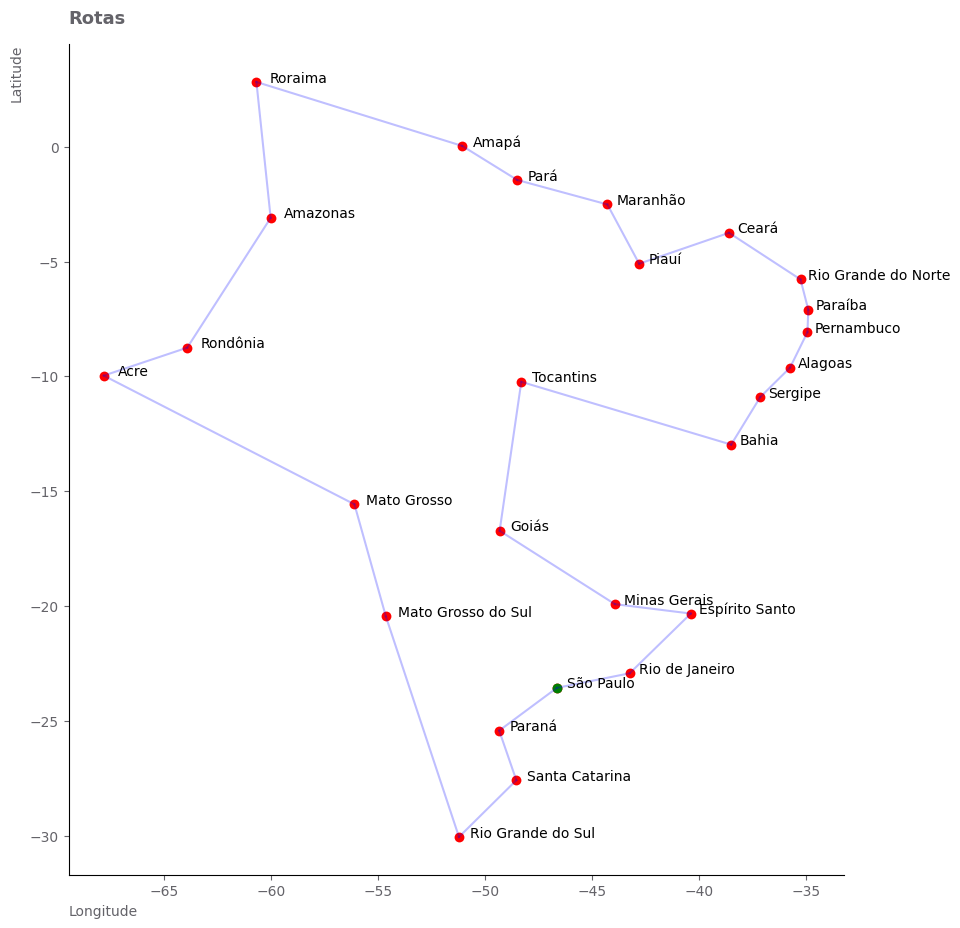

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 11), dpi=100)
sns.scatterplot(data=states_coords.loc[0:len(distancia),:], x='lng', y='lat', s=50, linewidth=0, color='red',
                ax=ax)  # cor opcional

sns.scatterplot(x=[states_coords.loc[0,"lng"]], y=[states_coords.loc[0,"lat"]], s=50, linewidth=0, color='green',
                ax=ax)

for i, j in resultados:
    plt.plot([states_coords.lng[i], states_coords.lng[j]], [states_coords.lat[i], states_coords.lat[j]],
              color="blue", alpha=0.25)

ax.set_title('Rotas', color='#646369', loc='left', pad=15, fontsize=13, weight='bold')
ax.tick_params(axis='both', colors='#646369',
                labelsize=10)

for i in distancia.index:
    ax.text(states_coords.loc[i,'lng']-0.01*states_coords.loc[i,'lng'], states_coords.loc[i,'lat'], capitais[i],color='black', fontsize=10)

ax.spines['bottom'].set_color('black')  
ax.spines['left'].set_color('black') 
ax.spines['right'].set_visible(False)      
ax.spines['top'].set_visible(False) 


ax.set_xlabel('Longitude', color='#646369', fontsize=10, position=(0, 0), horizontalalignment='left')
ax.set_ylabel('Latitude', color='#646369', fontsize=10, position=(0, 1), horizontalalignment='right')

### Cenário 2

In [ ]:
 states_coords

,estado,lat,lng,lat_rad,long_rad
0,São Paulo,-23.5587,-46.6250,-0.411177,-0.813760
1,Rio de Janeiro,-22.9250,-43.2250,-0.400117,-0.754419
2,Minas Gerais,-19.9150,-43.9150,-0.347582,-0.766461
3,Rio Grande do Sul,-30.0500,-51.2000,-0.524471,-0.893609
4,Pernambuco,-8.0756,-34.9156,-0.140946,-0.609392
5,Ceará,-3.7500,-38.5800,-0.065450,-0.673348
6,Bahia,-12.9700,-38.4800,-0.226369,-0.671603
7,Paraná,-25.4200,-49.3200,-0.443663,-0.860796
8,Pará,-1.4500,-48.4800,-0.025307,-0.846136
9,Goiás,-16.7200,-49.3000,-0.291819,-0.860447


In [ ]:
state_gmaps.head()

,São Paulo,Rio de Janeiro,Minas Gerais,Rio Grande do Sul,Pernambuco,Ceará,Bahia,Paraná,Pará,Goiás,Amazonas,Espírito Santo,Alagoas,Rio Grande do Norte,Maranhão,Santa Catarina,Paraíba,Piauí,Mato Grosso,Mato Grosso do Sul,Sergipe,Amapá,Rondônia,Acre,Tocantins,Roraima
0,0.0,434394.0,591068.0,1135135.0,2696840.0,3089984.0,2027872.0,414738.0,2903398.0,898426.0,3873378.0,943063.0,2479781.0,2989651.0,2994916.0,695461.0,2821456.0,2652282.0,1525607.0,992362.0,2222865.0,NaN,2985865.0,NaN,1812075.0,4621177.0
1,432204.0,0.0,441388.0,1568370.0,2300806.0,2586958.0,1631839.0,847974.0,3203717.0,1297651.0,4272603.0,522467.0,2083748.0,2593617.0,2930901.0,1128697.0,2425423.0,2588267.0,1924832.0,1416651.0,1826831.0,NaN,3385090.0,NaN,1985219.0,5020402.0
2,585937.0,440984.0,0.0,1721955.0,2136626.0,2422778.0,1467659.0,1001558.0,2772567.0,874594.0,3920763.0,522914.0,1919568.0,2429437.0,2499751.0,1282281.0,2261243.0,2157117.0,1572993.0,1263266.0,1662651.0,NaN,3033251.0,NaN,1554069.0,4668563.0
3,1142980.0,1568952.0,1725626.0,0.0,3831398.0,4197532.0,3162430.0,746179.0,4010947.0,2005975.0,4475083.0,2077621.0,3614339.0,4124208.0,4102465.0,456359.0,3956014.0,3759830.0,2127312.0,1425252.0,3357423.0,NaN,3587570.0,NaN,2919623.0,5222882.0
4,2640150.0,2301090.0,2084925.0,3776169.0,0.0,758591.0,806870.0,3055772.0,2025438.0,2314386.0,4673457.0,1842373.0,259029.0,288291.0,1553531.0,3336495.0,120096.0,1120608.0,3173456.0,3153700.0,501161.0,NaN,4181848.0,NaN,2039349.0,5421256.0


In [ ]:
distancia = state_gmaps

Neste cenário Amapá e Acre foram retirados porque os valores estão ausentes.

In [ ]:
states_coords = states_coords.drop([21,23],0)
states_coords.reset_index(inplace=True, drop=True)

In [ ]:
distancia = distancia.drop(['Amapá', 'Acre'], 1)
distancia = distancia.drop([21,23],0)
distancia.reset_index(inplace=True, drop=True)

In [ ]:
distancia.head()

,São Paulo,Rio de Janeiro,Minas Gerais,Rio Grande do Sul,Pernambuco,Ceará,Bahia,Paraná,Pará,Goiás,Amazonas,Espírito Santo,Alagoas,Rio Grande do Norte,Maranhão,Santa Catarina,Paraíba,Piauí,Mato Grosso,Mato Grosso do Sul,Sergipe,Rondônia,Tocantins,Roraima
0,0.0,434394.0,591068.0,1135135.0,2696840.0,3089984.0,2027872.0,414738.0,2903398.0,898426.0,3873378.0,943063.0,2479781.0,2989651.0,2994916.0,695461.0,2821456.0,2652282.0,1525607.0,992362.0,2222865.0,2985865.0,1812075.0,4621177.0
1,432204.0,0.0,441388.0,1568370.0,2300806.0,2586958.0,1631839.0,847974.0,3203717.0,1297651.0,4272603.0,522467.0,2083748.0,2593617.0,2930901.0,1128697.0,2425423.0,2588267.0,1924832.0,1416651.0,1826831.0,3385090.0,1985219.0,5020402.0
2,585937.0,440984.0,0.0,1721955.0,2136626.0,2422778.0,1467659.0,1001558.0,2772567.0,874594.0,3920763.0,522914.0,1919568.0,2429437.0,2499751.0,1282281.0,2261243.0,2157117.0,1572993.0,1263266.0,1662651.0,3033251.0,1554069.0,4668563.0
3,1142980.0,1568952.0,1725626.0,0.0,3831398.0,4197532.0,3162430.0,746179.0,4010947.0,2005975.0,4475083.0,2077621.0,3614339.0,4124208.0,4102465.0,456359.0,3956014.0,3759830.0,2127312.0,1425252.0,3357423.0,3587570.0,2919623.0,5222882.0
4,2640150.0,2301090.0,2084925.0,3776169.0,0.0,758591.0,806870.0,3055772.0,2025438.0,2314386.0,4673457.0,1842373.0,259029.0,288291.0,1553531.0,3336495.0,120096.0,1120608.0,3173456.0,3153700.0,501161.0,4181848.0,2039349.0,5421256.0


In [ ]:
distancia.columns = range(len(distancia))
distancia

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.0,434394.0,591068.0,1135135.0,2696840.0,3089984.0,2027872.0,414738.0,2903398.0,898426.0,3873378.0,943063.0,2479781.0,2989651.0,2994916.0,695461.0,2821456.0,2652282.0,1525607.0,992362.0,2222865.0,2985865.0,1812075.0,4621177.0
1,432204.0,0.0,441388.0,1568370.0,2300806.0,2586958.0,1631839.0,847974.0,3203717.0,1297651.0,4272603.0,522467.0,2083748.0,2593617.0,2930901.0,1128697.0,2425423.0,2588267.0,1924832.0,1416651.0,1826831.0,3385090.0,1985219.0,5020402.0
2,585937.0,440984.0,0.0,1721955.0,2136626.0,2422778.0,1467659.0,1001558.0,2772567.0,874594.0,3920763.0,522914.0,1919568.0,2429437.0,2499751.0,1282281.0,2261243.0,2157117.0,1572993.0,1263266.0,1662651.0,3033251.0,1554069.0,4668563.0
3,1142980.0,1568952.0,1725626.0,0.0,3831398.0,4197532.0,3162430.0,746179.0,4010947.0,2005975.0,4475083.0,2077621.0,3614339.0,4124208.0,4102465.0,456359.0,3956014.0,3759830.0,2127312.0,1425252.0,3357423.0,3587570.0,2919623.0,5222882.0
4,2640150.0,2301090.0,2084925.0,3776169.0,0.0,758591.0,806870.0,3055772.0,2025438.0,2314386.0,4673457.0,1842373.0,259029.0,288291.0,1553531.0,3336495.0,120096.0,1120608.0,3173456.0,3153700.0,501161.0,4181848.0,2039349.0,5421256.0
5,3101778.0,2587805.0,2371641.0,4209880.0,781506.0,0.0,1188705.0,3489484.0,1497455.0,2320033.0,4193252.0,2156986.0,950887.0,538655.0,900139.0,3770206.0,682287.0,592973.0,3179103.0,3159347.0,1108537.0,3701643.0,1763796.0,4941051.0
6,1971445.0,1632385.0,1416220.0,3107464.0,804914.0,1186218.0,0.0,2387067.0,2048363.0,1645681.0,4852521.0,1167033.0,581335.0,1091204.0,1576457.0,2667790.0,923009.0,1143534.0,2504751.0,2484995.0,314681.0,3965009.0,1438016.0,5600321.0
7,423669.0,849641.0,1006315.0,743889.0,3112087.0,3478221.0,2443119.0,0.0,3291636.0,1286664.0,4021268.0,1358310.0,2895028.0,3404897.0,3383154.0,304215.0,3236703.0,3040519.0,1673497.0,1003334.0,2638112.0,3133755.0,2200312.0,4769067.0
8,2883768.0,3121061.0,2693666.0,3991870.0,2025474.0,1499342.0,2050655.0,3271473.0,0.0,1982492.0,3047194.0,3188012.0,2104458.0,1974222.0,581827.0,3552196.0,2067919.0,906970.0,2490069.0,2846630.0,2017703.0,2555585.0,1221601.0,3794993.0
9,903126.0,1304979.0,891890.0,2011228.0,2314899.0,2319384.0,1645931.0,1290831.0,1981337.0,0.0,3242942.0,1405760.0,2097840.0,2607710.0,2007656.0,1571554.0,2439515.0,1881682.0,895171.0,841449.0,1840924.0,2355429.0,822544.0,3990741.0


##### Caixeiro Viajante


###### Cria o modelo no pyomo

In [ ]:
model = pyo.ConcreteModel('TSP - Cenario 2')

###### Conjuntos das Cidades 

In [ ]:
n = len(distancia) # defini o tamanho do conjunto

model.N = pyo.RangeSet(0, n-1)
model.M = pyo.RangeSet(0, n-1)
model.U = pyo.RangeSet(1, n-1)  # criacao de um indice para a variavel u


###### Variáveis de decisão

In [ ]:
model.x = pyo.Var(model.N, model.M, within=pyo.Binary)
model.u = pyo.Var(model.N, within=pyo.NonNegativeReals, bounds=(0, n - 1))

###### Custo (no caso apenas a distância)

In [ ]:
model.c = pyo.Param(model.N, model.M, initialize=lambda model, i, j: distancia[i][j])

###### Função Objetivo 

$ Min \displaystyle\sum_{i \neq j} c_{ij}x_{ij}$

In [ ]:
# Função objetivo -> Minimizar custo
def obj_func(model):
    return sum(model.x[i, j] * model.c[i, j] for i in model.N for j in model.M)

model.ob = pyo.Objective(rule=obj_func, sense=pyo.minimize)   
model.ob.pprint()

ob : Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : minimize : 432204.0*x[0,1] + 585937.0*x[0,2] + 1142980.0*x[0,3] + 2640150.0*x[0,4] + 3101778.0*x[0,5] + 1971445.0*x[0,6] + 423669.0*x[0,7] + 2883768.0*x[0,8] + 903126.0*x[0,9] + 3875768.0*x[0,10] + 942622.0*x[0,11] + 2423425.0*x[0,12] + 2925467.0*x[0,13] + 2907984.0*x[0,14] + 704635.0*x[0,15] + 2759042.0*x[0,16] + 2664383.0*x[0,17] + 1527495.0*x[0,18] + 992385.0*x[0,19] + 2167023.0*x[0,20] + 2988242.0*x[0,21] + 1724465.0*x[0,22] + 4626711.0*x[0,23] + 434394.0*x[1,0] + 440984.0*x[1,2] + 1568952.0*x[1,3] + 2301090.0*x[1,4] + 2587805.0*x[1,5] + 1632385.0*x[1,6] + 849641.0*x[1,7] + 3121061.0*x[1,8] + 1304979.0*x[1,9] + 4277622.0*x[1,10] + 524755.0*x[1,11] + 2084364.0*x[1,12] + 2586407.0*x[1,13] + 2924415.0*x[1,14] + 1130606.0*x[1,15] + 2419982.0*x[1,16] + 2584616.0*x[1,17] + 1929349.0*x[1,18] + 1418356.0*x[1,19] + 1827963.0*x[1,20] + 3390096.0*x[1,21] + 1972263.0*x[1,22] + 5028564.0*x[1,23] +

###### Restrições



 $\displaystyle\sum_{j \in M} x_{ij} = 1 \quad\forall \:i \in N \quad i\neq j \quad$  (R1)

In [ ]:
def rule_c1(model, j):
  return sum(model.x[i, j] for i in model.N if i != j) == 1

model.c1 = pyo.Constraint(model.N, rule=rule_c1)
model.c1.pprint()

c1 : Size=24, Index=N, Active=True
    Key : Lower : Body                                                                                                                                                                                                                                             : Upper : Active
      0 :   1.0 :                       x[1,0] + x[2,0] + x[3,0] + x[4,0] + x[5,0] + x[6,0] + x[7,0] + x[8,0] + x[9,0] + x[10,0] + x[11,0] + x[12,0] + x[13,0] + x[14,0] + x[15,0] + x[16,0] + x[17,0] + x[18,0] + x[19,0] + x[20,0] + x[21,0] + x[22,0] + x[23,0] :   1.0 :   True
      1 :   1.0 :                       x[0,1] + x[2,1] + x[3,1] + x[4,1] + x[5,1] + x[6,1] + x[7,1] + x[8,1] + x[9,1] + x[10,1] + x[11,1] + x[12,1] + x[13,1] + x[14,1] + x[15,1] + x[16,1] + x[17,1] + x[18,1] + x[19,1] + x[20,1] + x[21,1] + x[22,1] + x[23,1] :   1.0 :   True
      2 :   1.0 :                       x[0,2] + x[1,2] + x[3,2] + x[4,2] + x[5,2] + x[6,2] + x[7,2] + x[8,2] + x[9,2] + x[10,2] + x[11,2



$\displaystyle\sum_{i \in N} x_{ij} = 1 \quad\forall \:j \in N \quad i\neq j \quad $ (R2)

In [ ]:
def rule_c2(model, i):
    return sum(model.x[i, j] for j in model.M if i != j) == 1

model.c2 = pyo.Constraint(model.N, rule=rule_c2)
model.c2.pprint()

c2 : Size=24, Index=N, Active=True
    Key : Lower : Body                                                                                                                                                                                                                                             : Upper : Active
      0 :   1.0 :                       x[0,1] + x[0,2] + x[0,3] + x[0,4] + x[0,5] + x[0,6] + x[0,7] + x[0,8] + x[0,9] + x[0,10] + x[0,11] + x[0,12] + x[0,13] + x[0,14] + x[0,15] + x[0,16] + x[0,17] + x[0,18] + x[0,19] + x[0,20] + x[0,21] + x[0,22] + x[0,23] :   1.0 :   True
      1 :   1.0 :                       x[1,0] + x[1,2] + x[1,3] + x[1,4] + x[1,5] + x[1,6] + x[1,7] + x[1,8] + x[1,9] + x[1,10] + x[1,11] + x[1,12] + x[1,13] + x[1,14] + x[1,15] + x[1,16] + x[1,17] + x[1,18] + x[1,19] + x[1,20] + x[1,21] + x[1,22] + x[1,23] :   1.0 :   True
      2 :   1.0 :                       x[2,0] + x[2,1] + x[2,3] + x[2,4] + x[2,5] + x[2,6] + x[2,7] + x[2,8] + x[2,9] + x[2,10] + x[2,11



$ u_i - u_j + (n - 1)x_{ij} \leq n-1 \quad\forall \:i \in U \quad j \in N \quad i\neq j \quad$ (R3)

In [ ]:
def rule_c3(model, i, j):
    if i!=j:
        return model.u[i] - model.u[j] + model.x[i, j] * n <= n - 1
    else:
        return model.u[i] - model.u[i] == 0

model.c3 = pyo.Constraint(model.U, model.N, rule=rule_c3)
model.c3.pprint()

c3 : Size=552, Index=c3_index, Active=True
    Key      : Lower : Body                        : Upper : Active
      (1, 0) :  -Inf :     u[1] - u[0] + 24*x[1,0] :  23.0 :   True
      (1, 1) :   0.0 :                 u[1] - u[1] :   0.0 :   True
      (1, 2) :  -Inf :     u[1] - u[2] + 24*x[1,2] :  23.0 :   True
      (1, 3) :  -Inf :     u[1] - u[3] + 24*x[1,3] :  23.0 :   True
      (1, 4) :  -Inf :     u[1] - u[4] + 24*x[1,4] :  23.0 :   True
      (1, 5) :  -Inf :     u[1] - u[5] + 24*x[1,5] :  23.0 :   True
      (1, 6) :  -Inf :     u[1] - u[6] + 24*x[1,6] :  23.0 :   True
      (1, 7) :  -Inf :     u[1] - u[7] + 24*x[1,7] :  23.0 :   True
      (1, 8) :  -Inf :     u[1] - u[8] + 24*x[1,8] :  23.0 :   True
      (1, 9) :  -Inf :     u[1] - u[9] + 24*x[1,9] :  23.0 :   True
     (1, 10) :  -Inf :   u[1] - u[10] + 24*x[1,10] :  23.0 :   True
     (1, 11) :  -Inf :   u[1] - u[11] + 24*x[1,11] :  23.0 :   True
     (1, 12) :  -Inf :   u[1] - u[12] + 24*x[1,12] :  23.0 :   True
     

###### Resolver 

In [ ]:
#resolver
solver = pyo.SolverFactory('glpk')
result = solver.solve(model, tee = True, keepfiles = True, 
                      logfile = "logteste_cenario2.txt")
print(result)

Solver log file: 'logteste_cenario2.txt'
Solver solution file: '/tmp/tmpmt9vv5h1.glpk.raw'
Solver problem files: ('/tmp/tmpvt4gxm_g.pyomo.lp',)
GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write /tmp/tmpmt9vv5h1.glpk.raw --wglp /tmp/tmpqc05ae4g.glpk.glp --cpxlp
 /tmp/tmpvt4gxm_g.pyomo.lp
Reading problem data from '/tmp/tmpvt4gxm_g.pyomo.lp'...
/tmp/tmpvt4gxm_g.pyomo.lp:5655: warning: lower bound of variable 'x2' redefined
/tmp/tmpvt4gxm_g.pyomo.lp:5655: warning: upper bound of variable 'x2' redefined
601 rows, 577 columns, 2692 non-zeros
552 integer variables, all of which are binary
6207 lines were read
Writing problem data to '/tmp/tmpqc05ae4g.glpk.glp'...
5028 lines were written
GLPK Integer Optimizer, v4.65
601 rows, 577 columns, 2692 non-zeros
552 integer variables, all of which are binary
Preprocessing...
577 rows, 576 columns, 2691 non-zeros
552 integer variables, all of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  2.400e

In [ ]:
resultados = [i for i in model.x.keys() if model.x[i]() == 1]
origem = [i[0] for i in resultados]
destinos = [i[1] for i in resultados]

In [ ]:
print(capitais)

{0: 'São Paulo', 1: 'Rio de Janeiro', 2: 'Minas Gerais', 3: 'Rio Grande do Sul', 4: 'Pernambuco', 5: 'Ceará', 6: 'Bahia', 7: 'Paraná', 8: 'Pará', 9: 'Goiás', 10: 'Amazonas', 11: 'Espírito Santo', 12: 'Alagoas', 13: 'Rio Grande do Norte', 14: 'Maranhão', 15: 'Santa Catarina', 16: 'Paraíba', 17: 'Piauí', 18: 'Mato Grosso', 19: 'Mato Grosso do Sul', 20: 'Sergipe', 21: 'Amapá', 22: 'Rondônia', 23: 'Acre', 24: 'Tocantins', 25: 'Roraima'}


In [ ]:
# traça a rota 
route = [0]
for pos in range(len(resultados)):
    route.append(resultados[route[-1]][1])
print(route)

capitais = states_coords['estado'].to_dict()
route2 = [capitais[i] for i in route]
print(route2)

[0, 7, 15, 3, 19, 18, 21, 10, 23, 8, 14, 17, 5, 13, 16, 4, 12, 20, 6, 22, 9, 2, 11, 1, 0]
['São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Rondônia', 'Amazonas', 'Roraima', 'Pará', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Tocantins', 'Goiás', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo']


###### Mapa com as rotas

A rota encontrada foi: 

São Paulo $\rightarrow$ Paraná $\rightarrow$ Santa Catarina $\rightarrow$ Rio Grande do Sul $\rightarrow$ Mato Grosso do Sul $\rightarrow$ Mato Grosso $\rightarrow$ Rondônia $\rightarrow$ Amazonas $\rightarrow$ Roraima $\rightarrow$ Pará $\rightarrow$ Maranhão $\rightarrow$ Piauí $\rightarrow$ Ceará $\rightarrow$ Rio Grande do Norte $\rightarrow$ Paraíba $\rightarrow$ Pernambuco $\rightarrow$ Alagoas $\rightarrow$ Sergipe $\rightarrow$ Bahia $\rightarrow$ Tocantins $\rightarrow$ Goiás $\rightarrow$ Minas Gerais $\rightarrow$ Espírito Santo $\rightarrow$ Rio de Janeiro $\rightarrow$ São Paulo.

A distância total percorrida foi 18.135,65 km.

O tempo de execução do solver foi de 62.67 segundos.


Text(0, 1, 'Latitude')

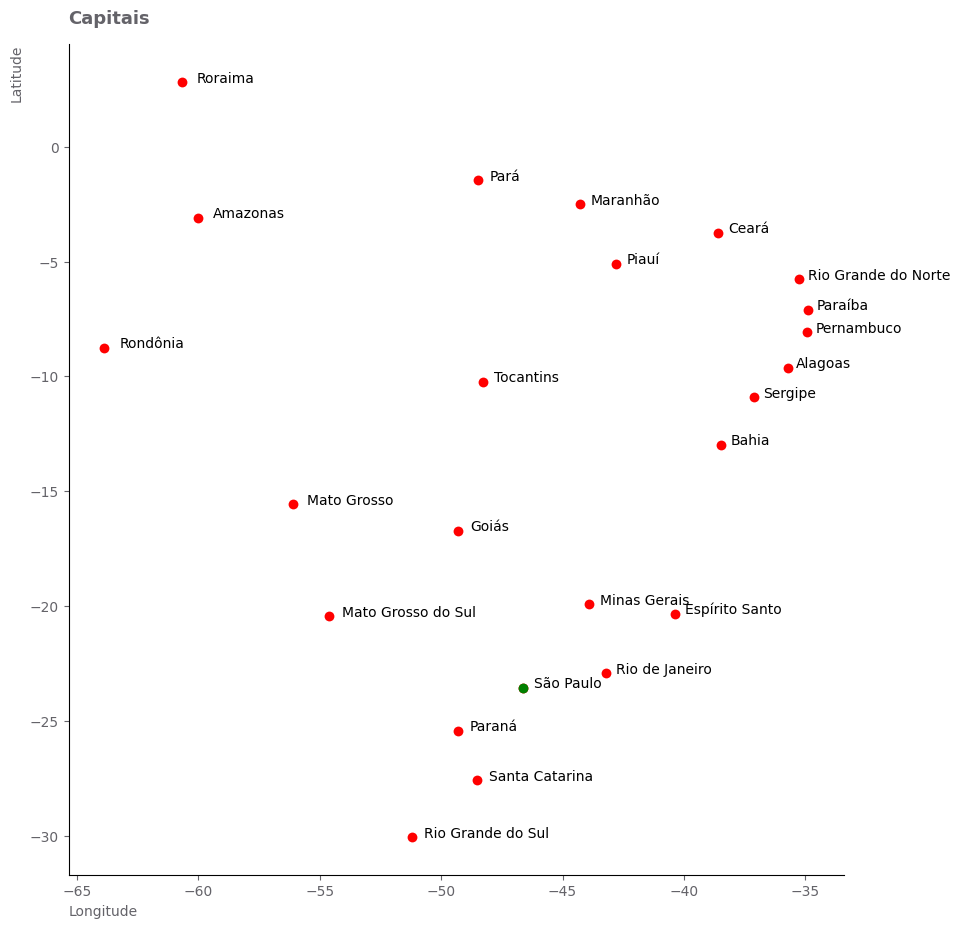

In [ ]:
# Etapa 3: Monta o gráfico com os pontos escolhidos
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 11), dpi=100)
sns.scatterplot(data=states_coords.loc[0:len(distancia),:], x="lng", y="lat", s=50, linewidth=0, color='red',
                ax=ax)
sns.scatterplot(x=[states_coords.loc[0,"lng"]], y=[states_coords.loc[0,"lat"]], s=50, linewidth=0, color='green',
                ax=ax)

ax.set_title('Capitais', color='#646369', loc='left', pad=15, fontsize=13, weight='bold')
ax.tick_params(axis='both', colors='#646369',
                labelsize=10)  # modifica a aparência dos ticks, ticks labels e gridlines

for i in distancia.index:
    ax.text(states_coords.loc[i,'lng']-0.01*states_coords.loc[i,'lng'], states_coords.loc[i,'lat'], capitais[i],color='black', fontsize=10)


ax.spines['bottom'].set_color('black')  
ax.spines['left'].set_color('black') 
ax.spines['right'].set_visible(False)      
ax.spines['top'].set_visible(False) 

ax.set_xlabel('Longitude', color='#646369', fontsize=10, position=(0, 0), horizontalalignment='left')
ax.set_ylabel('Latitude', color='#646369', fontsize=10, position=(0, 1), horizontalalignment='right')


Text(0, 1, 'Latitude')

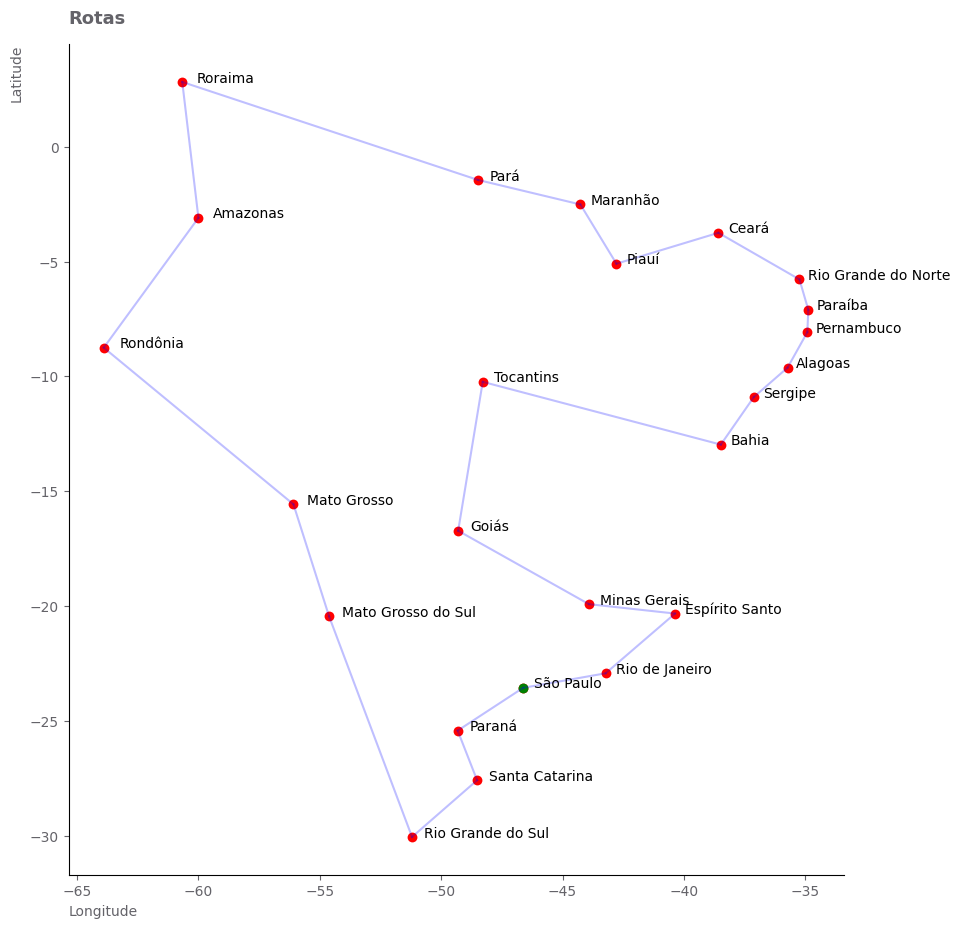

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 11), dpi=100)  # resolução (pontos/polegada)
sns.scatterplot(data=states_coords.loc[0:len(distancia),:], x='lng', y='lat', s=50, linewidth=0, color='red',
                ax=ax)  # cor opcional

sns.scatterplot(x=[states_coords.loc[0,"lng"]], y=[states_coords.loc[0,"lat"]], s=50, linewidth=0, color='green',
                ax=ax)

for i, j in resultados:
    plt.plot([states_coords.lng[i], states_coords.lng[j]], [states_coords.lat[i], states_coords.lat[j]],
              color="blue", alpha=0.25)

ax.set_title('Rotas', color='#646369', loc='left', pad=15, fontsize=13, weight='bold')
ax.tick_params(axis='both', colors='#646369',
                labelsize=10)  # modifica a aparência dos ticks, ticks labels e gridlines

for i in distancia.index:
    ax.text(states_coords.loc[i,'lng']-0.01*states_coords.loc[i,'lng'], states_coords.loc[i,'lat'], capitais[i],color='black', fontsize=10)

ax.spines['bottom'].set_color('black')  
ax.spines['left'].set_color('black') 
ax.spines['right'].set_visible(False)      
ax.spines['top'].set_visible(False) 


ax.set_xlabel('Longitude', color='#646369', fontsize=10, position=(0, 0), horizontalalignment='left')
ax.set_ylabel('Latitude', color='#646369', fontsize=10, position=(0, 1), horizontalalignment='right')

### Considerações Finais

O Problema do Caixeiro Viajante é do tipo Np-hard, ou seja, de difícil trato computacional. Para isto foi implementado usando a biblioteca de modelagem matemática Pyomo que pode-se escolher o resolvedor. No caso, foi escolhido para execução no modelo o GLPK, um resolvedor *open source*, no entanto este demorou muito para achar a solução ótima. 

Como atribuição futura, seria interessante a implementação junto a um API de distâncias reais como o API do Google ou OSRM (Open Source Routing Machine). Usando estes APIs, pode-se verificar as rotas reais em estradas de todo o país. 

Outro ponto de interesse, seria a implementação de heurísticas, meta-heurísticas ou algorítmos bioinspirados como testes, mesmo o problema sendo de pequeno porte. 